In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import tensorflow as tf
import keras
from keras.layers import Dense , Flatten  , Conv2D , MaxPool2D , Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
first_= '../Downloads/Fruits/Apple(1-5)/'
second= '../Downloads/Fruits/Apple(5-10)/'
third= '../Downloads/Fruits/Apple(10-14)/'

In [3]:
import cv2
import os
all_images = []
predic_images = []
lst = [first_ , second , third]
k = -1
for j in lst:
    k += 1
    for filename in os.listdir(j):
        img = cv2.imread(os.path.join(j, filename))
        img = cv2.resize(img , (300,300))
        if img is not None:
            predic_images.append(k)
            img = np.array(img)
            all_images.append(img)
            
print(len(all_images)) 
    

608


In [4]:
print(img.shape)

(300, 300, 3)


In [5]:
all_images = np.array(all_images)
predic_images = np.array(predic_images)


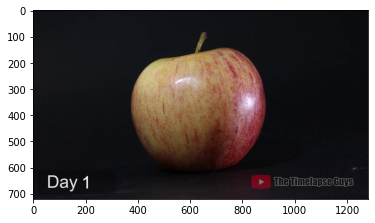

In [6]:
import cv2
img = cv2.imread('../Downloads/Fruits/Apple(10-14)/frame1.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)		# this converts it into RGB

plt.imshow(rgb_img)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    all_images, predic_images, test_size=0.25, random_state=101)


In [8]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

456
152
456
152


In [9]:
X_test.shape

(152, 300, 300, 3)

In [10]:
y_test.shape

(152,)

In [11]:
y_train = to_categorical(y_train ,3)
y_test = to_categorical(y_test ,3 )

In [12]:
y_test.shape

(152, 3)

In [13]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [14]:
from keras.models import Sequential
from keras.layers import MaxPooling2D

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(300,300,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 296, 296, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 148, 148, 64)      0         
                                                                 
 flatten (Flatten)           (None, 1401856)           0         
                                                                 
 dense (Dense)               (None, 128)               179437696 
                                                        

In [18]:
histroy = model.fit(X_train , y_train , epochs = 20 , validation_data= (X_test , y_test))

Epoch 1/20
15/15 [==============================] - 660s 43s/step - loss: 3669.6936 - accuracy: 0.4057 - val_loss: 23.5725 - val_accuracy: 0.3882
Epoch 2/20
15/15 [==============================] - 596s 40s/step - loss: 15.9778 - accuracy: 0.4978 - val_loss: 10.2573 - val_accuracy: 0.6250
Epoch 3/20
15/15 [==============================] - 556s 36s/step - loss: 4.4568 - accuracy: 0.6184 - val_loss: 1.1690 - val_accuracy: 0.8026
Epoch 4/20
15/15 [==============================] - 405s 28s/step - loss: 0.8047 - accuracy: 0.7456 - val_loss: 0.3939 - val_accuracy: 0.9013
Epoch 5/20
15/15 [==============================] - 438s 30s/step - loss: 0.4712 - accuracy: 0.8246 - val_loss: 0.2581 - val_accuracy: 0.8750
Epoch 6/20
15/15 [==============================] - 412s 27s/step - loss: 0.3350 - accuracy: 0.8575 - val_loss: 0.2296 - val_accuracy: 0.9342
Epoch 7/20
15/15 [==============================] - 372s 25s/step - loss: 0.3120 - accuracy: 0.8925 - val_loss: 0.2072 - val_accuracy: 0.9671


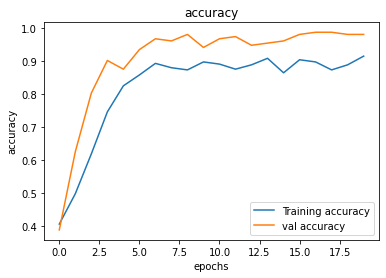

In [19]:
plt.figure(0)
plt.plot(histroy.history['accuracy'] , label = 'Training accuracy')
plt.plot(histroy.history['val_accuracy'] , label = 'val accuracy')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

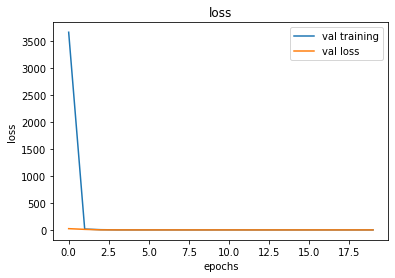

In [20]:
plt.figure(0)
plt.plot(histroy.history['loss'] , label = 'val training')
plt.plot(histroy.history['val_loss'] , label = 'val loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()